In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.applications import VGG16
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall
import tensorflow_addons as tfa
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

F:\New folder\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
len(os.listdir('F:/collage/minor2/archive/COVID-19_Radiography_Dataset/COVID/images'))

3616

In [3]:
img = cv2.imread('F:/collage/minor2/archive/COVID-19_Radiography_Dataset/Normal/images/Normal-5.png')

In [4]:
type(img)

numpy.ndarray

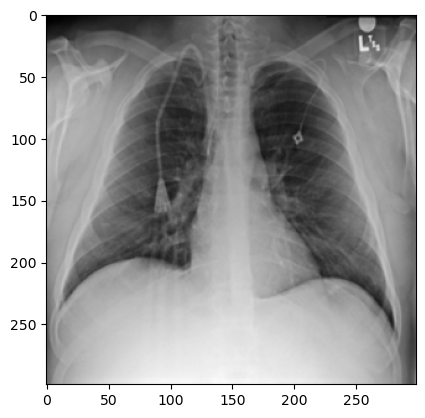

In [5]:
plt.imshow(img)

In [6]:
urls = os.listdir('F:/collage/minor2/archive/COVID-19_Radiography_Dataset/COVID/images')

In [7]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [8]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [9]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img 
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [10]:
covid_path = "F:/collage/minor2/archive/COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [11]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [12]:
normal_path = "F:/collage/minor2/archive/COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [13]:
pne_path="F:/collage/minor2/archive/COVID-19_Radiography_Dataset/Viral_Pneumonia/images"
pne_urls=os.listdir(pne_path)
pneImages,pneTargets=loadImages(pne_path,pne_urls,2)

In [14]:
pneImages.shape

(1345, 100, 100, 3)

In [15]:
covidImages.shape

(3616, 100, 100, 3)

In [16]:
normalImages.shape

(10192, 100, 100, 3)

In [17]:
data = np.r_[covidImages, normalImages, pneImages]

In [18]:
data.shape

(15153, 100, 100, 3)

In [19]:
targets = np.r_[covidTargets, normalTargets,pneTargets]

In [20]:
targets.shape

(15153,)

In [24]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(targets) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

class_names = [str(cls) for cls in le.classes_]


[0 1 2]
[0. 1. 0.]


In [45]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25,random_state=42, stratify=labels)

In [46]:
model5a = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])



In [47]:
model5a.summary()

model5a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 16)       

In [52]:
history = model5a.fit(x_train, y_train,batch_size=32,epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
356/356 [==============================] - 58s 164ms/step - loss: 0.4104 - accuracy: 0.8234 - val_loss: 0.3790 - val_accuracy: 0.8337
Epoch 2/50
356/356 [==============================] - 57s 159ms/step - loss: 0.3540 - accuracy: 0.8531 - val_loss: 0.3346 - val_accuracy: 0.8604
Epoch 3/50
356/356 [==============================] - 54s 151ms/step - loss: 0.3083 - accuracy: 0.8704 - val_loss: 0.2789 - val_accuracy: 0.8860
Epoch 4/50
356/356 [==============================] - 54s 150ms/step - loss: 0.2793 - accuracy: 0.8908 - val_loss: 0.3372 - val_accuracy: 0.8657
Epoch 5/50
356/356 [==============================] - 53s 150ms/step - loss: 0.2616 - accuracy: 0.8928 - val_loss: 0.2946 - val_accuracy: 0.8812
Epoch 6/50
356/356 [==============================] - 54s 150ms/step - loss: 0.2394 - accuracy: 0.9045 - val_loss: 0.3110 - val_accuracy: 0.8797
Epoch 7/50
356/356 [==============================] - 59s 167ms/step - loss: 0.2362 - accuracy: 0.9082 - val_loss: 0.2395 - val_ac

In [50]:
model5a.history.history

{'loss': [0.5417263507843018],
 'accuracy': [0.7656635046005249],
 'val_loss': [0.3928403854370117],
 'val_accuracy': [0.8326735496520996]}

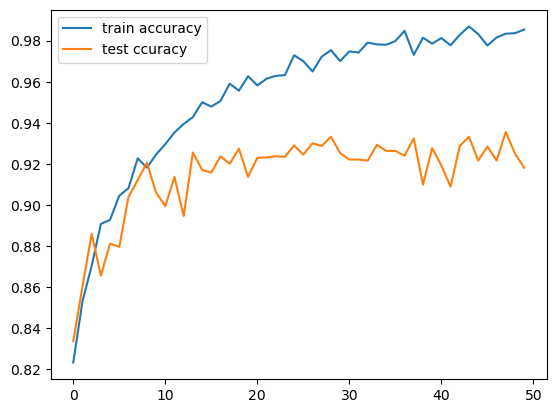

In [53]:
plt.plot(model5a.history.history['accuracy'], label = 'train accuracy')
plt.plot(model5a.history.history['val_accuracy'],label = 'test ccuracy')
plt.legend()
plt.show()
plt.plot(model5a.history.history['loss'], label = 'train loss')
plt.plot(model5a.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

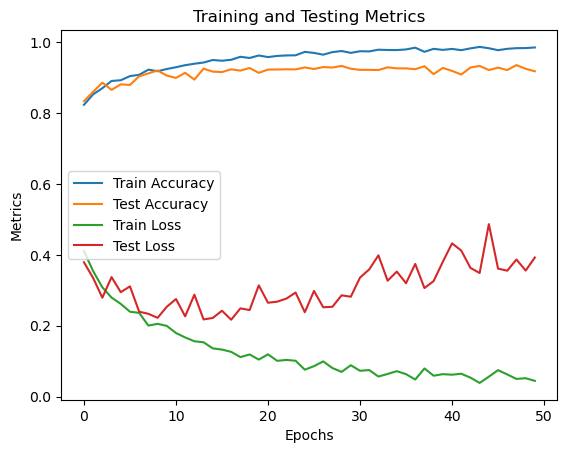

In [55]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(model5a.history.history['accuracy'], label='Train Accuracy')
plt.plot(model5a.history.history['val_accuracy'], label='Test Accuracy')

# Plot loss
plt.plot(model5a.history.history['loss'], label='Train Loss')
plt.plot(model5a.history.history['val_loss'], label='Test Loss')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Training and Testing Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')

# Show plot
plt.show()


In [34]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [35]:
#classification report on train
predIdxs = model5a.predict (x_train, batch_size=32)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(y_train.argmax(axis=1), predIdxs, target_names=class_names, digits=3))

predIdxs=[]

# classification report on test
predIdxs=model5a.predict(x_test, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(y_test.argmax(axis=1), predIdxs, target_names=class_names, digits=3))
     


356/356 [==============================] - 12s 33ms/step
              precision    recall  f1-score   support

           0      0.997     0.995     0.996      7643
           1      0.988     0.992     0.990      2712
           2      0.991     0.996     0.994      1009

    accuracy                          0.994     11364
   macro avg      0.992     0.994     0.993     11364
weighted avg      0.994     0.994     0.994     11364

60/60 [==============================] - 4s 62ms/step
              precision    recall  f1-score   support

           0      0.940     0.944     0.942      2549
           1      0.862     0.840     0.850       904
           2      0.908     0.943     0.926       336

    accuracy                          0.919      3789
   macro avg      0.903     0.909     0.906      3789
weighted avg      0.919     0.919     0.919      3789



In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(y_test.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[2406  122   21]
 [ 134  759   11]
 [  19    0  317]]


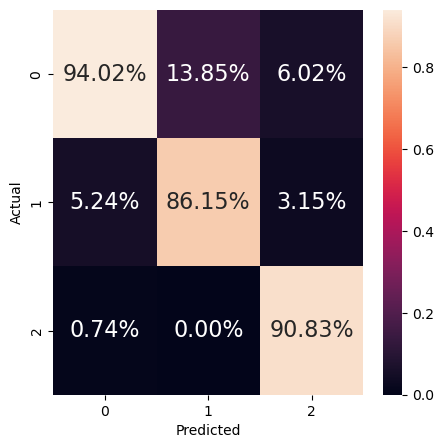

In [38]:
import seaborn as sns
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()